<a href="https://colab.research.google.com/github/rafaeldjsm/Engenharia/blob/main/ORCAMENTO/graph_curvaABC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving ORÇAMENTO DE DEMONSTRAÇÃO ORÇA - Curva ABC de Insumos.xlsx to ORÇAMENTO DE DEMONSTRAÇÃO ORÇA - Curva ABC de Insumos (4).xlsx


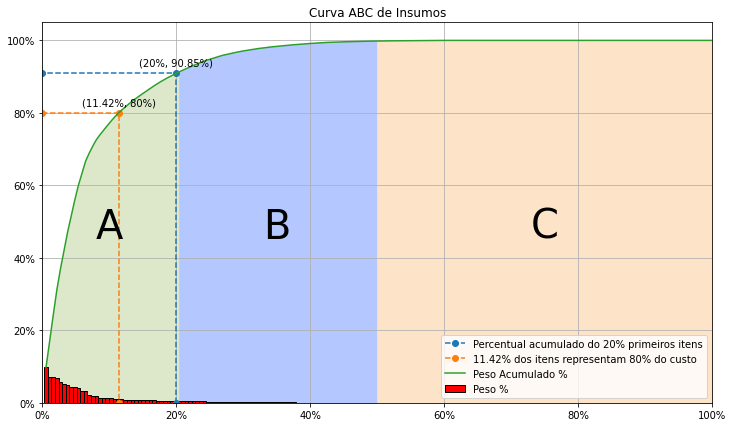

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib import ticker
uploaded = files.upload()

df = pd.read_excel(*list(uploaded.keys()))
idpeso = np.where(df=='Peso')
l,c = (int(k) for k in idpeso)

df2 = df.iloc[l+1:,c:].copy()
df2.dropna(inplace = True)
df2 = df2.iloc[:,0]

df2 = df2.apply(lambda x:str(x).replace(',','.').replace('%','')).astype(float)

x = np.array([100*(k+1)/len(df2) for k in range(len(df2))])
y = df2.values
yac = np.cumsum(y)

l20 = np.interp(20, x, yac)

plt.figure(figsize=(12,7))
plt.plot([20,20,0],[0,l20,l20],'--o',label = "Percentual acumulado do 20% primeiros itens")
plt.text(20, l20+2, '({}%, {:.2f}%)'.format(20, l20),ha = 'center')

l80 = np.interp(80,yac, x)
plt.plot([0,l80,l80],[80,80,0],'--o',label = f"{l80:.2f}% dos itens representam 80% do custo")
plt.text(l80,82, '({:.2f}%, {}%)'.format(l80, 80),ha = 'center')

plt.plot(x,yac,label = "Peso Acumulado %")
plt.bar(x=x, height= y, data = df2, width = x[0], edgecolor = 'black', color = 'r',label = "Peso %")

plt.fill_between(x,yac, where=(x <= x[x>20][0]), color='#dde8cb')
plt.text(10, l20/2, 'A', fontsize = 40,ha = 'center')

plt.fill_between(x,yac, where=(np.logical_and(x>=20,x<=50)), color='#b4c7ff')
plt.text(35, l20/2, 'B', fontsize = 40, ha = 'center')

plt.fill_between(x,yac, where=(x>=50), color='#fde4c9')
plt.text(75, l20/2, 'C', fontsize = 40,ha = 'center')

plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter())
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())
plt.grid()
plt.title("Curva ABC de Insumos")
plt.xlim((0,100))
plt.legend()
plt.show()